In [1]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import SelectKBest
from Missing_Values import remove_nulls
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

import numpy as np
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'poi_contact_ratio1', 'poi_contact_ratio2','salary', 
                 'to_messages', 'total_payments', 'bonus', 
                 'total_stock_value', 'shared_receipt_with_poi',
                 'exercised_stock_options', 'from_messages',
                 'other', 'from_this_person_to_poi', 'expenses', 
                 'restricted_stock', 'from_poi_to_this_person', 
                'total_worth', 'exp/net' ] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
data_dict.pop('TOTAL',0)
data_dict = remove_nulls(data_dict, .5)

### Task 3: Create new feature(s)
df = pd.DataFrame.from_dict(data_dict, orient='index')
df = df.replace('NaN', np.nan)

 # net worth feature
net_worth =['salary', 'total_payments', 'bonus', 'total_stock_value',
            'exercised_stock_options', 'restricted_stock']
df['total_worth'] = df[net_worth].sum(1)

 # expenses:networth ratio feature
df['exp/net'] = df.expenses / df.total_worth

 # from person to poi ratio feature
df['poi_contact_ratio1']  = pd.to_numeric(df['from_this_person_to_poi']) / pd.to_numeric(df['to_messages'])

 # from poi to person ratio feature
df['poi_contact_ratio2'] = df.from_poi_to_this_person / df.from_messages

# re-transform to dict 
data_dict = df.to_dict(orient='index')

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html


steps = [
    ('PCA', PCA(random_state=42)),
    ('LR', LogisticRegression(random_state=42,
                              penalty = 'l1', C=0.3,
                              intercept_scaling = 100))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)


# Metrics
print classification_report(y_test, y_pred)

print "AUC - ROC : ", roc_auc_score(y_test, y_pred)

clf = pipeline


### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html


print 'Searching...'
params = {
          'LR__C': np.logspace(-10, 10, 20),
         'LR__penalty': ['l1', 'l2'],
         'LR__intercept_scaling': [1, 10 , 100, 1000,10000,1000000]}

grid = GridSearchCV(pipeline, params,cv=5, scoring='f1')

grid.fit(X_train, y_train)

grid_pred = grid.predict(X_test)
print 'Best parameters: '
print grid.best_params_
print 'GridSearch classification report:'
print classification_report(y_test, grid_pred)




### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

C:\Users\alema\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


             precision    recall  f1-score   support

        0.0       0.97      0.93      0.95        40
        1.0       0.50      0.75      0.60         4

avg / total       0.93      0.91      0.92        44

AUC - ROC :  0.8375
Searching...


C:\Users\alema\Anaconda3\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters: 
{'LR__intercept_scaling': 100, 'LR__penalty': 'l1', 'LR__C': 0.2976351441631313}
GridSearch classification report:
             precision    recall  f1-score   support

        0.0       0.97      0.93      0.95        40
        1.0       0.50      0.75      0.60         4

avg / total       0.93      0.91      0.92        44



In [2]:
feats[supp]

NameError: name 'feats' is not defined

In [8]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

kbest = SelectKBest()
kbest.fit(X_train, y_train)
print kbest.get_params()
scores = kbest.scores_
print scores.sum()
print kbest.pvalues_.sum()



{'k': 10, 'score_func': <function f_classif at 0x000000000AD73CF8>}
101.498718846
3.95406876981


NameError: name 'kbest' is not defined

NameError: name 'p' is not defined

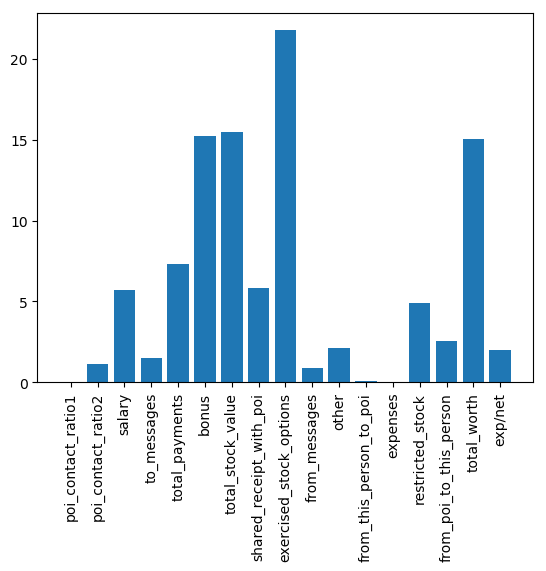

NameError: name 'supp' is not defined

In [22]:
feats = features_list[1:]
p = np.arange(len(feats))
plt.bar(p, scores)
plt.xticks(p, feats, rotation = 'vertical')
plt.show()
print zip(scores, supp, feats)


[0.952139 0.040840 0.004939 0.000964 0.000601 0.000496 0.000020 0.000002
 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 0.000000]


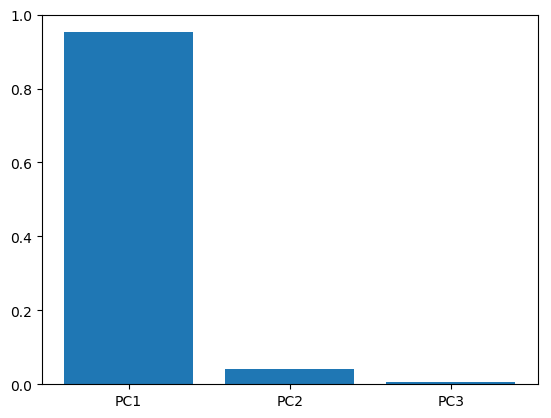

In [20]:
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
exp_ratio = pipeline.named_steps['PCA'].explained_variance_ratio_

print pipeline.named_steps['PCA'].explained_variance_ratio_

labels = ['PC1', 'PC2', 'PC3']

plt.bar(labels, exp_ratio[:3])
plt.show()